<a href="https://colab.research.google.com/github/yousefelsonbaty/EmoBrace-ML/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Define Emotion and Suggestion Pairs**

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset from a CSV file
df = pd.read_csv('sensor_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

                    Timestamp  Temperature       ECG       GSR Emotion
0  2025-03-30 13:16:35.347204     88.91125  0.697163  1.334600   Happy
1  2025-03-30 13:17:36.378501    141.41000  0.974850  0.676850   Happy
2  2025-03-30 13:18:37.419309     95.75750  1.076825  1.036263   Happy
3  2025-03-30 13:19:38.441201    123.28875  0.750600  0.881800   Happy
4  2025-03-30 13:20:39.479548    137.80375  0.916175  0.718638   Happy


# **Step 2: Preprocess the Data**

In [ ]:
# Assuming df is your dataframe with columns like 'Timestamp', 'Temperature', 'ECG', 'GSR', 'Emotion'
# Drop the 'Timestamp' column
df = df.drop(columns=['Timestamp'])

# Encode the emotion labels
le = LabelEncoder()
df['Emotion_encoded'] = le.fit_transform(df['Emotion'])

# Standardize physiological data
scaler = StandardScaler()
df[['Temperature', 'ECG', 'GSR']] = scaler.fit_transform(df[['Temperature', 'ECG', 'GSR']])

# Prepare features and target
X = df[['Temperature', 'ECG', 'GSR']]  # The physiological data
y = df['Emotion_encoded']  # The encoded emotion labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can print the shapes of the data splits to verify
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(801, 3) (201, 3) (801,) (201,)


# **Step 3: Model Comparison and Automatic Selection**


Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

       Angry       0.59      0.64      0.61        36
     Anxious       0.48      0.39      0.43        33
       Happy       0.48      0.55      0.52        29
     Neutral       0.38      0.56      0.45        25
         Sad       0.28      0.16      0.21        43
    Stressed       0.60      0.69      0.64        35

    accuracy                           0.48       201
   macro avg       0.47      0.50      0.48       201
weighted avg       0.47      0.48      0.47       201



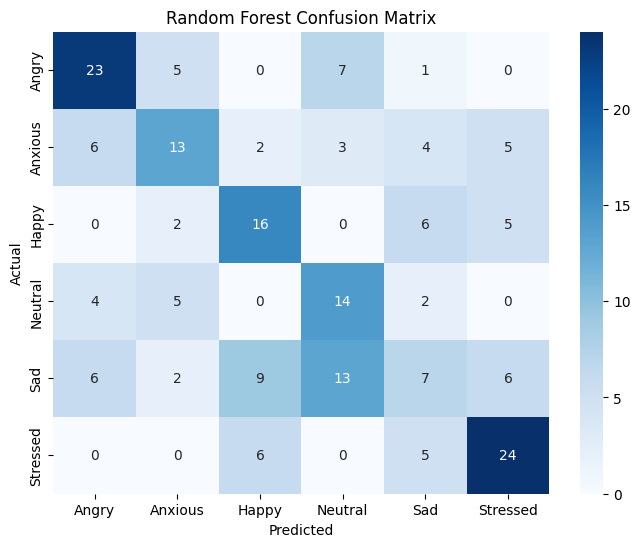


Model: SVM
Classification Report:
               precision    recall  f1-score   support

       Angry       0.63      0.86      0.73        36
     Anxious       0.53      0.48      0.51        33
       Happy       0.51      0.62      0.56        29
     Neutral       0.40      0.56      0.47        25
         Sad       0.40      0.09      0.15        43
    Stressed       0.60      0.71      0.65        35

    accuracy                           0.54       201
   macro avg       0.51      0.56      0.51       201
weighted avg       0.51      0.54      0.50       201



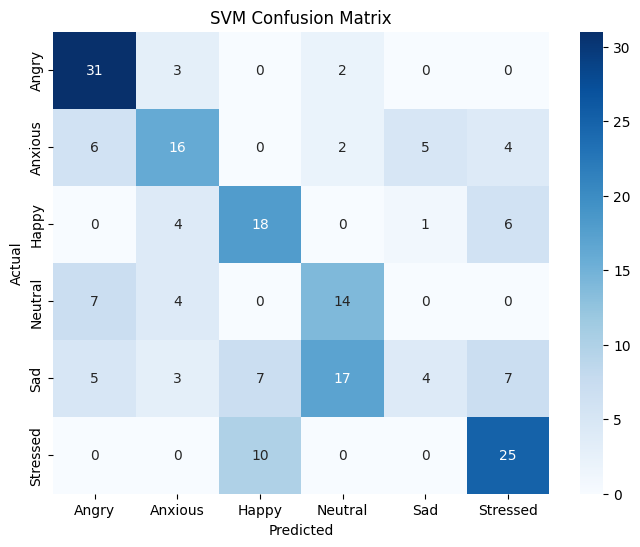


Model: KNN
Classification Report:
               precision    recall  f1-score   support

       Angry       0.57      0.72      0.63        36
     Anxious       0.44      0.48      0.46        33
       Happy       0.45      0.52      0.48        29
     Neutral       0.43      0.64      0.52        25
         Sad       0.35      0.14      0.20        43
    Stressed       0.59      0.54      0.57        35

    accuracy                           0.49       201
   macro avg       0.47      0.51      0.48       201
weighted avg       0.47      0.49      0.47       201



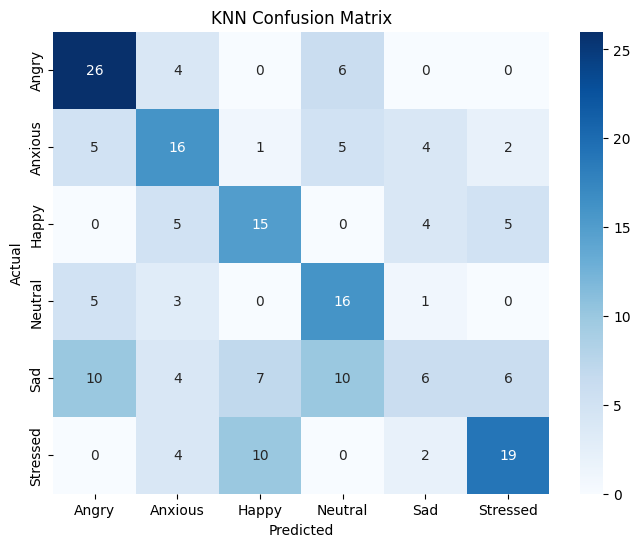


Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

       Angry       0.62      0.81      0.70        36
     Anxious       0.36      0.24      0.29        33
       Happy       0.51      0.62      0.56        29
     Neutral       0.40      0.68      0.51        25
         Sad       0.29      0.14      0.19        43
    Stressed       0.74      0.71      0.72        35

    accuracy                           0.51       201
   macro avg       0.49      0.53      0.50       201
weighted avg       0.48      0.51      0.48       201



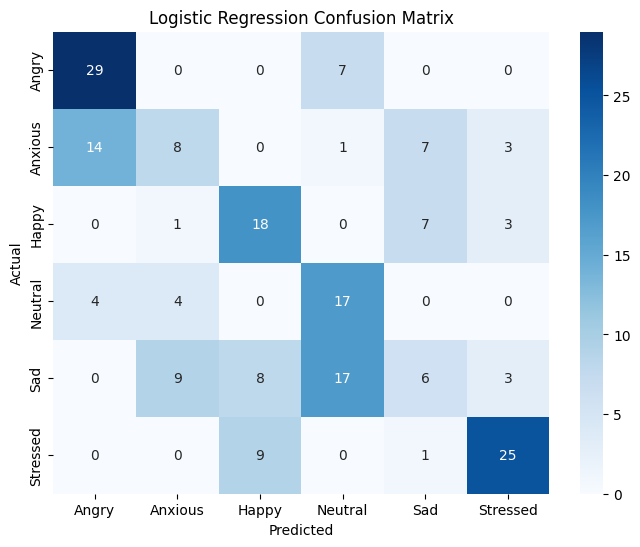


Model: XGBoost
Classification Report:
               precision    recall  f1-score   support

       Angry       0.49      0.56      0.52        36
     Anxious       0.42      0.33      0.37        33
       Happy       0.48      0.52      0.50        29
     Neutral       0.44      0.64      0.52        25
         Sad       0.46      0.28      0.35        43
    Stressed       0.59      0.69      0.63        35

    accuracy                           0.49       201
   macro avg       0.48      0.50      0.48       201
weighted avg       0.48      0.49      0.48       201



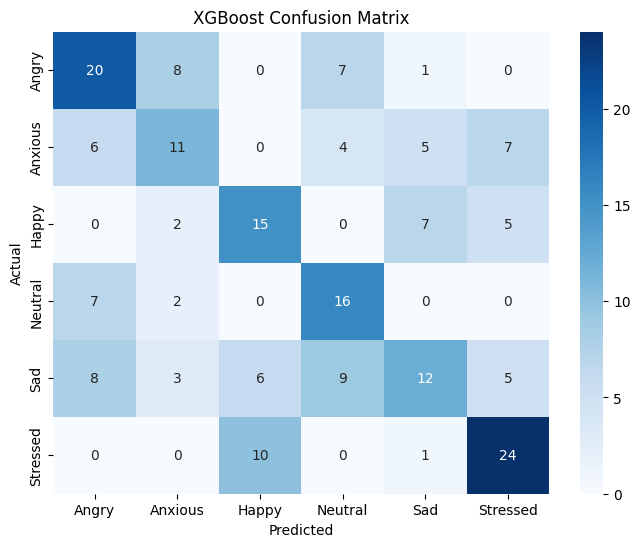

Model Comparison Summary:
                      Accuracy  Precision    Recall  F1-Score
Random Forest        0.482587   0.466068  0.482587  0.467119
SVM                  0.537313   0.514045  0.537313  0.498596
KNN                  0.487562   0.472462  0.487562  0.465273
Logistic Regression  0.512438   0.483916  0.512438  0.483485
XGBoost              0.487562   0.482586  0.487562  0.476034

Selected Best Model: SVM


In [ ]:
# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': GradientBoostingClassifier(random_state=42)
}

# To store evaluation results for comparison
model_comparison = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    model_comparison[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    # Print classification report
    print(f"\nModel: {model_name}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Convert results to a DataFrame for easy comparison
comparison_df = pd.DataFrame(model_comparison).T
print("Model Comparison Summary:\n", comparison_df)

# Automatically select the best model based on F1-Score
best_model_name = comparison_df['F1-Score'].idxmax()
best_model = models[best_model_name]
print(f"\nSelected Best Model: {best_model_name}")

# **Step 4: Hyperparameter Tuning of the Best Model**

In [ ]:
# Define hyperparameter grid based on selected best model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10]
    }
}

# Get the parameter grid for the selected model
param_grid = param_grids[best_model_name]

# Perform grid search on the selected model
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator from Grid Search
best_model = grid_search.best_estimator_
print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


# **Step 5: Final Model Training and Deployment**

In [ ]:
# Train the final model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nFinal Model Test Set Accuracy: {accuracy}")
print(f"Final Model Precision: {precision}")
print(f"Final Model Recall: {recall}")
print(f"Final Model F1-Score: {f1}")

# Save the final model and scaler for deployment
joblib.dump(best_model, 'final_emotion_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Final model and scaler saved for deployment.")


Final Model Test Set Accuracy: 0.5522388059701493
Final Model Precision: 0.5351762238536155
Final Model Recall: 0.5522388059701493
Final Model F1-Score: 0.5154337733575215
Final model and scaler saved for deployment.
